<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r9_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r9-good.csv?token=AKVFSOFIEAVI3NVH3WDNYKC6X3NXM"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r9-mal.csv?token=AKVFSOBJXVJMTTGOGM7E4426X3NXU"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [4]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,129,1,4,2,1,4,3,9,24,8,29,13,1,2,1,0.500000,8,1,1,1,1,1,4,2,8,8,6,27,18,1
1,940,1,2,2,1,4,3,9,27,11,29,13,9,3,2,0.666667,12,1,1,1,1,1,2,2,8,72,6,27,18,1
2,1034,0,3,1,1,4,3,9,0,0,25,9,10,3,3,1.000000,16,1,1,1,1,1,0,1,4,40,3,27,9,1
3,1042,1,0,2,1,4,3,9,25,9,29,13,10,1,0,0.000000,4,1,1,1,1,1,0,2,8,80,6,27,18,1
4,1086,0,1,3,1,4,3,9,29,13,25,9,10,1,1,1.000000,8,1,1,1,1,1,0,3,12,120,9,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11319,3250231,1,3,5,2,2,3,9,0,0,29,13,10014,4,3,0.750000,23,1,1,1,1,1,3,10,20,200280,15,27,45,1
11320,3250238,1,3,5,3,2,3,9,0,0,29,13,10014,4,3,0.750000,30,1,1,1,1,1,3,15,30,300420,15,27,45,1
11321,3250245,1,3,5,4,2,3,9,0,0,29,13,10014,4,3,0.750000,37,1,1,1,1,1,3,20,40,400560,15,27,45,1
11322,3250252,1,3,5,5,3,3,9,0,0,29,13,10014,4,3,0.750000,44,1,1,1,1,1,3,25,75,751050,15,27,45,1


In [5]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,125,1,4,2,1,4,3,9,24,8,29,13,2,2,1,0.500000,8,7,1,7,7,49,4,2,8,16,6,27,18,0
1,146,1,4,2,1,4,3,9,24,8,29,13,3,2,1,0.500000,8,6,2,7,12,84,4,2,8,24,6,27,18,0
2,173,3,1,4,1,1,5,17,29,13,1,1,2,3,1,0.333333,9,5,3,7,15,105,3,4,4,8,20,85,100,0
3,174,3,1,4,2,2,5,17,29,13,1,1,2,3,1,0.333333,10,4,4,7,16,112,3,8,16,32,20,85,100,0
4,175,3,1,4,3,2,5,17,29,13,1,1,2,3,1,0.333333,11,3,5,7,15,105,3,12,24,48,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,2021442,3,1,4,1,1,5,17,29,13,1,1,11079,3,1,0.333333,8,1,1,1,1,1,3,4,4,44316,20,85,100,0
18357,2021443,3,1,4,2,2,5,17,29,13,1,1,11079,3,1,0.333333,9,1,1,1,1,1,3,8,16,177264,20,85,100,0
18358,2021444,3,1,4,3,2,5,17,29,13,1,1,11079,3,1,0.333333,10,1,1,1,1,1,3,12,24,265896,20,85,100,0
18359,2021445,3,1,4,4,2,5,17,29,13,1,1,11079,3,1,0.333333,11,1,1,1,1,1,3,16,32,354528,20,85,100,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [7]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [9]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,125,1,4,2,1,4,3,9,24,8,29,13,2,2,1,0.500000,8,7,1,7,7,49,4,2,8,16,6,27,18,0
1,129,1,4,2,1,4,3,9,24,8,29,13,1,2,1,0.500000,8,1,1,1,1,1,4,2,8,8,6,27,18,1
2,146,1,4,2,1,4,3,9,24,8,29,13,3,2,1,0.500000,8,6,2,7,12,84,4,2,8,24,6,27,18,0
3,173,3,1,4,1,1,5,17,29,13,1,1,2,3,1,0.333333,9,5,3,7,15,105,3,4,4,8,20,85,100,0
4,174,3,1,4,2,2,5,17,29,13,1,1,2,3,1,0.333333,10,4,4,7,16,112,3,8,16,32,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29680,3250231,1,3,5,2,2,3,9,0,0,29,13,10014,4,3,0.750000,23,1,1,1,1,1,3,10,20,200280,15,27,45,1
29681,3250238,1,3,5,3,2,3,9,0,0,29,13,10014,4,3,0.750000,30,1,1,1,1,1,3,15,30,300420,15,27,45,1
29682,3250245,1,3,5,4,2,3,9,0,0,29,13,10014,4,3,0.750000,37,1,1,1,1,1,3,20,40,400560,15,27,45,1
29683,3250252,1,3,5,5,3,3,9,0,0,29,13,10014,4,3,0.750000,44,1,1,1,1,1,3,25,75,751050,15,27,45,1


In [10]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,-0.152832,0.123372,0.080074,-0.004756,0.007122,-0.212831,-0.208990,-0.119342,-0.155405,0.190666,0.186260,0.828936,-0.032241,0.055836,0.060052,0.135525,-0.387161,-0.387153,-0.467062,-0.352818,-0.255580,-0.021653,0.041915,0.033651,0.463157,-0.069107,-0.212674,-0.174755,0.453351
outport,-0.152832,1.000000,-0.446994,0.089587,-0.067794,0.101340,0.688048,0.742728,0.543222,0.627642,-0.912032,-0.854241,-0.015041,0.534997,-0.172810,-0.490027,-0.527413,-0.002510,0.124412,0.073531,0.028442,-0.004680,0.567885,-0.149643,-0.059118,-0.055173,0.560387,0.714926,0.752887,-0.305404
inport,0.123372,-0.446994,1.000000,0.010405,0.012420,-0.018566,-0.414402,-0.497629,-0.508880,-0.572020,0.428357,0.398761,0.036711,0.117615,0.458134,0.628010,0.394989,-0.056495,-0.136791,-0.116589,-0.095681,-0.073867,0.343385,0.059270,0.030872,0.043521,-0.275272,-0.451119,-0.418741,0.193030
cache_coherence_type,0.080074,0.089587,0.010405,1.000000,0.219855,-0.328645,-0.307346,-0.316852,0.152638,0.071175,0.044918,0.066743,0.041815,-0.049095,-0.177552,-0.220177,-0.294340,-0.014760,-0.065521,-0.048425,-0.027617,-0.011591,0.178265,0.462251,0.390077,0.297110,0.755441,-0.313263,0.224610,0.106374
flit_id,-0.004756,-0.067794,0.012420,0.219855,1.000000,-0.049590,0.156142,0.095167,-0.020512,-0.006416,0.056473,0.067193,0.013351,-0.028820,0.027057,0.012332,0.428688,-0.012682,0.053757,0.024776,0.016108,0.010123,-0.093914,0.945630,0.897600,0.662828,0.320124,0.132288,0.278467,-0.036289
flit_type,0.007122,0.101340,-0.018566,-0.328645,-0.049590,1.000000,-0.233404,-0.142257,0.030662,0.009590,-0.084416,-0.100442,-0.019958,0.043080,-0.040445,-0.018434,0.391646,-0.047028,0.062948,0.009603,0.002783,0.003425,0.140385,-0.103361,0.172163,0.124931,-0.478529,-0.197748,-0.416259,0.054245
vnet,-0.212831,0.688048,-0.414402,-0.307346,0.156142,-0.233404,1.000000,0.972779,0.389540,0.543865,-0.792455,-0.764839,-0.031523,0.395656,-0.012875,-0.198958,-0.394868,0.047573,0.144234,0.115697,0.060286,0.016316,0.183209,-0.061741,-0.080339,-0.077456,0.391321,0.995517,0.858251,-0.410286
vc,-0.208990,0.742728,-0.497629,-0.316852,0.095167,-0.142257,0.972779,1.000000,0.422733,0.562242,-0.823899,-0.793687,-0.031354,0.361367,-0.101800,-0.318733,-0.408206,0.047558,0.162906,0.126951,0.076015,0.032981,0.201717,-0.116395,-0.108792,-0.099300,0.363386,0.990337,0.825249,-0.400582
src_ni,-0.119342,0.543222,-0.508880,0.152638,-0.020512,0.030662,0.389540,0.422733,1.000000,0.972177,-0.386532,-0.308370,-0.041428,-0.150405,-0.614458,-0.601618,-0.439992,0.021722,0.085891,0.064912,0.034430,0.006655,0.247612,0.007327,0.028410,-0.001925,0.415826,0.405670,0.481218,-0.183282
src_router,-0.155405,0.627642,-0.572020,0.071175,-0.006416,0.009590,0.543865,0.562242,0.972177,1.000000,-0.524456,-0.453958,-0.042128,0.002254,-0.483103,-0.510869,-0.471913,0.030253,0.101187,0.079284,0.039485,0.005718,0.239231,-0.026894,-0.001676,-0.024658,0.443306,0.554970,0.595312,-0.259554


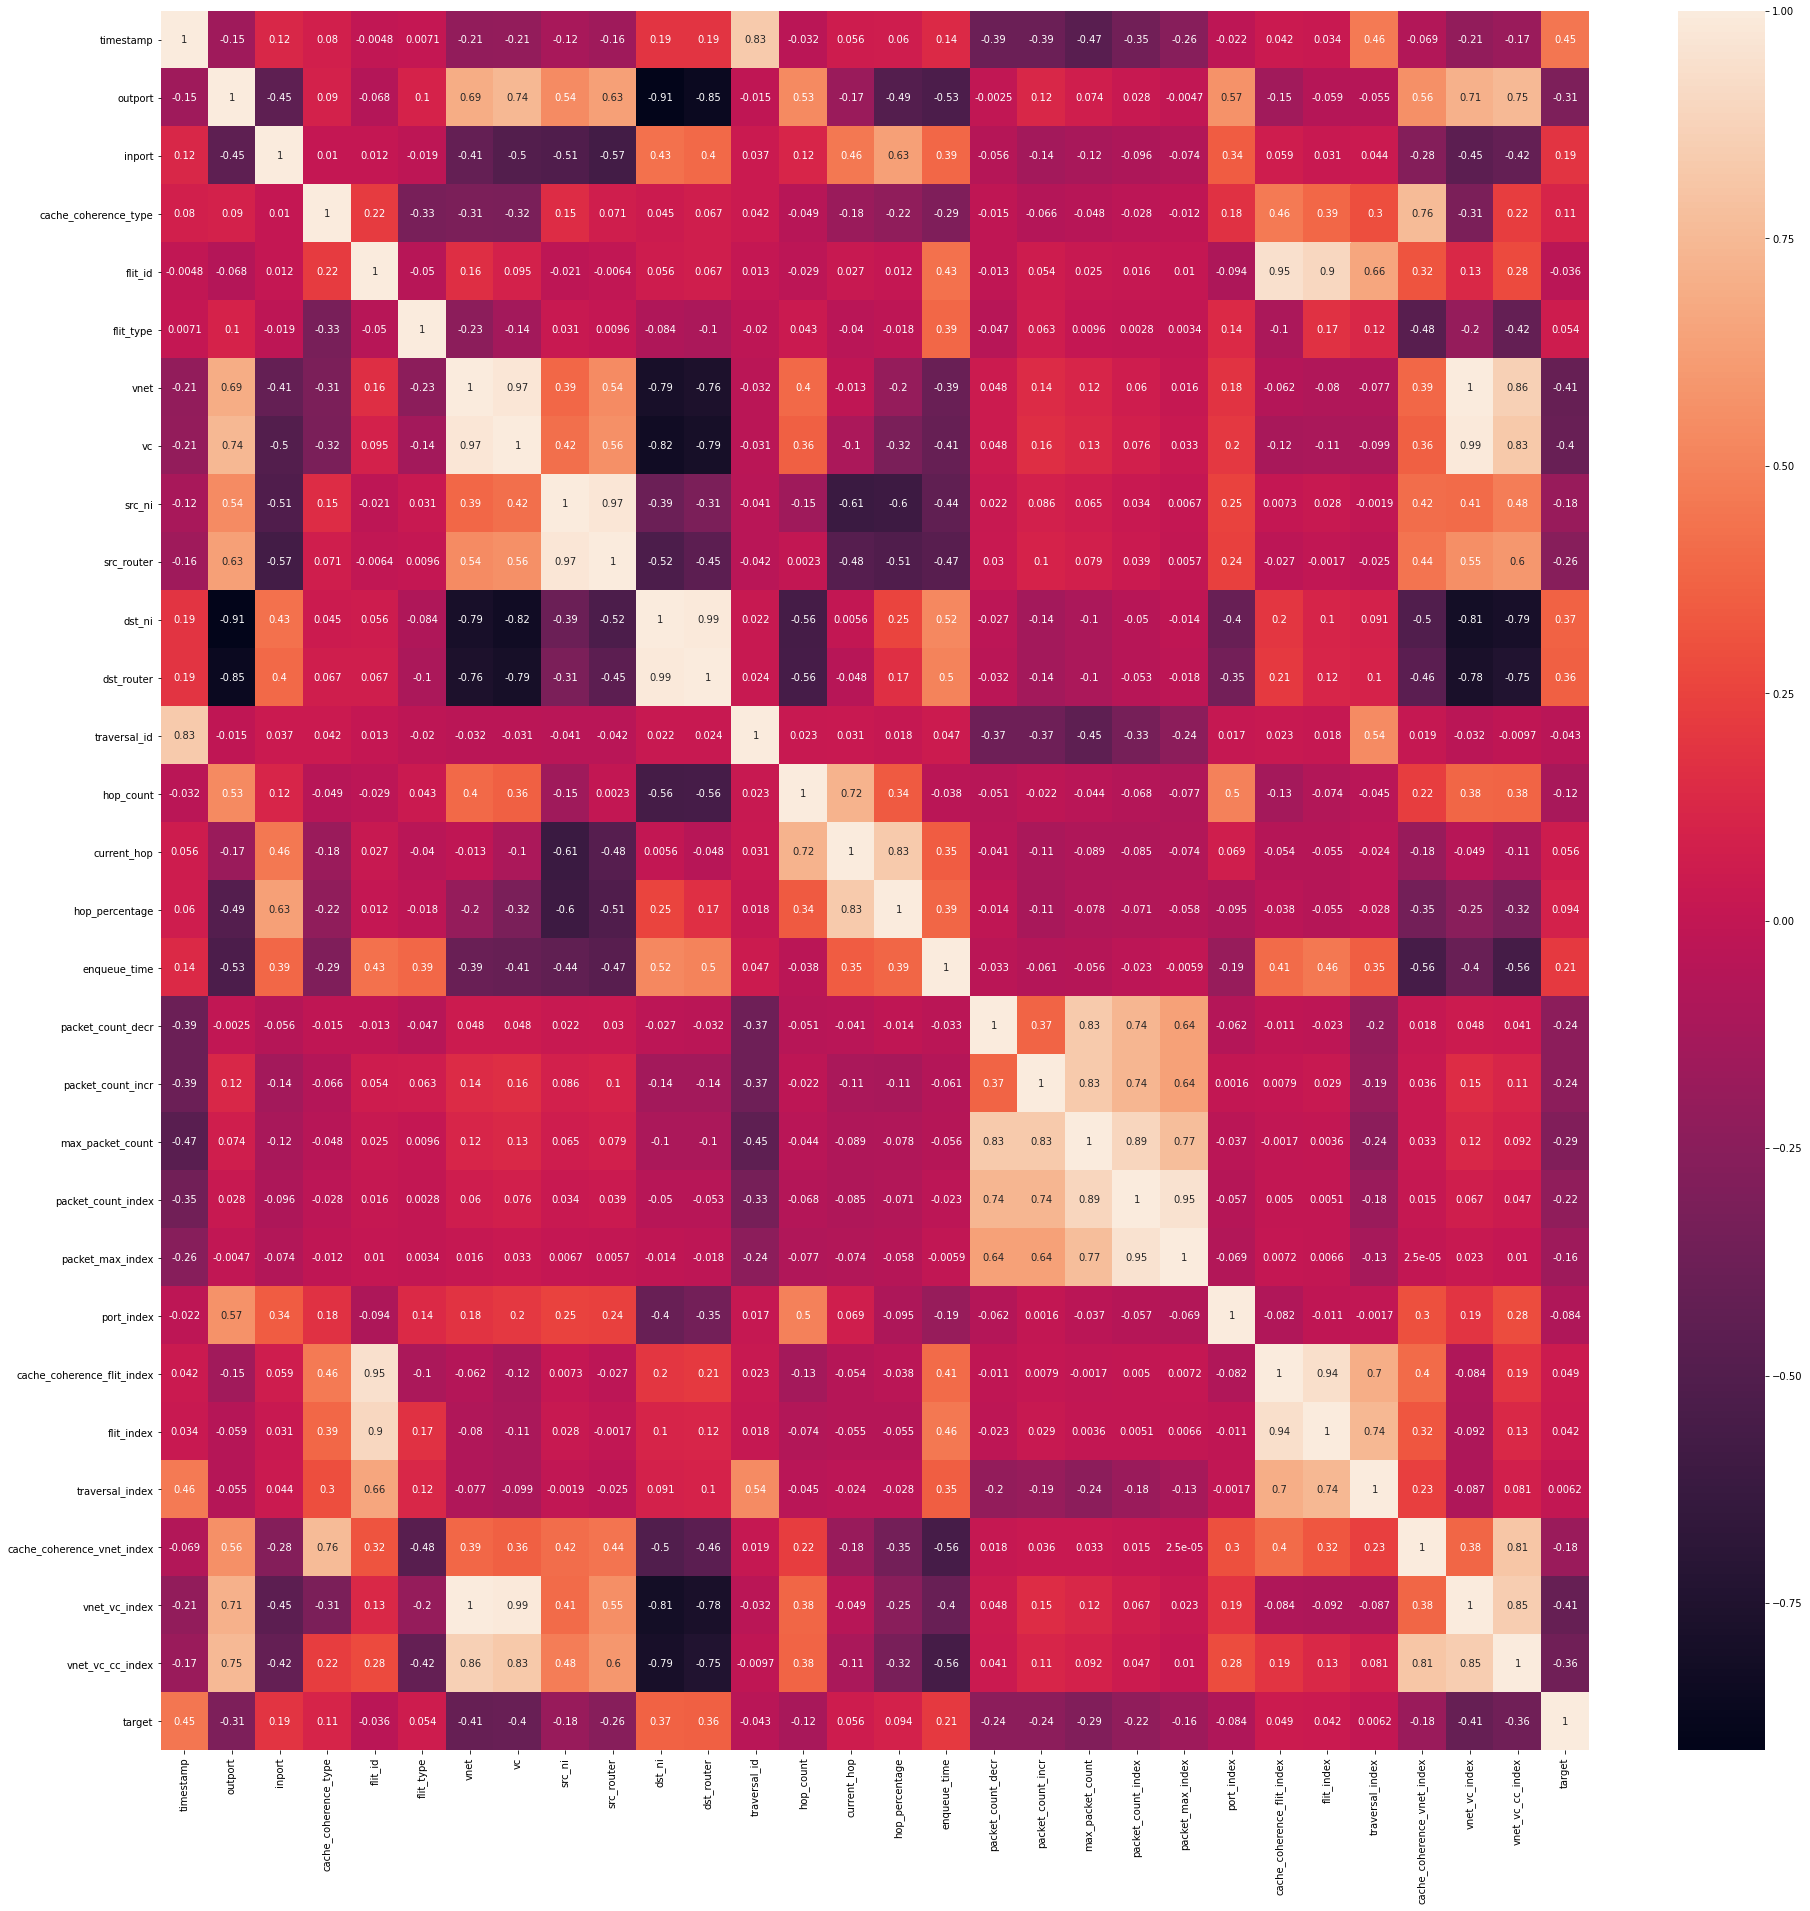

In [11]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [12]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1,4,2,1,4,3,9,29,13,2,2,1,0.500000,8,7,1,7,7,49,4,2,8,16,6,27,18
1,1,4,2,1,4,3,9,29,13,1,2,1,0.500000,8,1,1,1,1,1,4,2,8,8,6,27,18
2,1,4,2,1,4,3,9,29,13,3,2,1,0.500000,8,6,2,7,12,84,4,2,8,24,6,27,18
3,3,1,4,1,1,5,17,1,1,2,3,1,0.333333,9,5,3,7,15,105,3,4,4,8,20,85,100
4,3,1,4,2,2,5,17,1,1,2,3,1,0.333333,10,4,4,7,16,112,3,8,16,32,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29680,1,3,5,2,2,3,9,29,13,10014,4,3,0.750000,23,1,1,1,1,1,3,10,20,200280,15,27,45
29681,1,3,5,3,2,3,9,29,13,10014,4,3,0.750000,30,1,1,1,1,1,3,15,30,300420,15,27,45
29682,1,3,5,4,2,3,9,29,13,10014,4,3,0.750000,37,1,1,1,1,1,3,20,40,400560,15,27,45
29683,1,3,5,5,3,3,9,29,13,10014,4,3,0.750000,44,1,1,1,1,1,3,25,75,751050,15,27,45


In [13]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,1.00,0.166667,0.00,1.000000,0.0,0.000,1.000000,1.000000,0.000090,0.25,0.25,0.500000,0.071429,0.250000,0.000000,0.25,0.035714,0.011364,0.333333,0.034483,0.046512,0.000008,0.166667,0.000000,0.098901
1,0.25,1.00,0.166667,0.00,1.000000,0.0,0.000,1.000000,1.000000,0.000000,0.25,0.25,0.500000,0.071429,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.034483,0.046512,0.000000,0.166667,0.000000,0.098901
2,0.25,1.00,0.166667,0.00,1.000000,0.0,0.000,1.000000,1.000000,0.000181,0.25,0.25,0.500000,0.071429,0.208333,0.041667,0.25,0.065476,0.019650,0.333333,0.034483,0.046512,0.000016,0.166667,0.000000,0.098901
3,0.75,0.25,0.500000,0.00,0.000000,1.0,1.000,0.034483,0.076923,0.000090,0.50,0.25,0.333333,0.089286,0.166667,0.083333,0.25,0.083333,0.024621,0.250000,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
4,0.75,0.25,0.500000,0.25,0.333333,1.0,1.000,0.034483,0.076923,0.000090,0.50,0.25,0.333333,0.107143,0.125000,0.125000,0.25,0.089286,0.026278,0.250000,0.241379,0.139535,0.000024,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29680,0.25,0.75,0.666667,0.25,0.333333,0.0,0.000,1.000000,1.000000,0.903864,0.75,0.75,0.750000,0.339286,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.310345,0.186047,0.200872,0.666667,0.000000,0.395604
29681,0.25,0.75,0.666667,0.50,0.333333,0.0,0.000,1.000000,1.000000,0.903864,0.75,0.75,0.750000,0.464286,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.482759,0.302326,0.301312,0.666667,0.000000,0.395604
29682,0.25,0.75,0.666667,0.75,0.333333,0.0,0.000,1.000000,1.000000,0.903864,0.75,0.75,0.750000,0.589286,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.655172,0.418605,0.401752,0.666667,0.000000,0.395604
29683,0.25,0.75,0.666667,1.00,0.666667,0.0,0.000,1.000000,1.000000,0.903864,0.75,0.75,0.750000,0.714286,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.827586,0.825581,0.753293,0.666667,0.000000,0.395604


In [14]:
train_X[train_X.duplicated()].shape

(178, 26)

In [15]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.446994,0.089587,-0.067794,0.101340,0.688048,0.742728,-0.912032,-0.854241,-0.015041,0.534997,-0.172810,-0.490027,-0.527413,-0.002510,0.124412,0.073531,0.028442,-0.004680,0.567885,-0.149643,-0.059118,-0.055173,0.560387,0.714926,0.752887,-0.305404
inport,-0.446994,1.000000,0.010405,0.012420,-0.018566,-0.414402,-0.497629,0.428357,0.398761,0.036711,0.117615,0.458134,0.628010,0.394989,-0.056495,-0.136791,-0.116589,-0.095681,-0.073867,0.343385,0.059270,0.030872,0.043521,-0.275272,-0.451119,-0.418741,0.193030
cache_coherence_type,0.089587,0.010405,1.000000,0.219855,-0.328645,-0.307346,-0.316852,0.044918,0.066743,0.041815,-0.049095,-0.177552,-0.220177,-0.294340,-0.014760,-0.065521,-0.048425,-0.027617,-0.011591,0.178265,0.462251,0.390077,0.297110,0.755441,-0.313263,0.224610,0.106374
flit_id,-0.067794,0.012420,0.219855,1.000000,-0.049590,0.156142,0.095167,0.056473,0.067193,0.013351,-0.028820,0.027057,0.012332,0.428688,-0.012682,0.053757,0.024776,0.016108,0.010123,-0.093914,0.945630,0.897600,0.662828,0.320124,0.132288,0.278467,-0.036289
flit_type,0.101340,-0.018566,-0.328645,-0.049590,1.000000,-0.233404,-0.142257,-0.084416,-0.100442,-0.019958,0.043080,-0.040445,-0.018434,0.391646,-0.047028,0.062948,0.009603,0.002783,0.003425,0.140385,-0.103361,0.172163,0.124931,-0.478529,-0.197748,-0.416259,0.054245
vnet,0.688048,-0.414402,-0.307346,0.156142,-0.233404,1.000000,0.972779,-0.792455,-0.764839,-0.031523,0.395656,-0.012875,-0.198958,-0.394868,0.047573,0.144234,0.115697,0.060286,0.016316,0.183209,-0.061741,-0.080339,-0.077456,0.391321,0.995517,0.858251,-0.410286
vc,0.742728,-0.497629,-0.316852,0.095167,-0.142257,0.972779,1.000000,-0.823899,-0.793687,-0.031354,0.361367,-0.101800,-0.318733,-0.408206,0.047558,0.162906,0.126951,0.076015,0.032981,0.201717,-0.116395,-0.108792,-0.099300,0.363386,0.990337,0.825249,-0.400582
dst_ni,-0.912032,0.428357,0.044918,0.056473,-0.084416,-0.792455,-0.823899,1.000000,0.990225,0.022380,-0.564619,0.005566,0.253964,0.522456,-0.026863,-0.142602,-0.102220,-0.050481,-0.013529,-0.403471,0.196129,0.103861,0.091093,-0.502201,-0.810541,-0.787258,0.371698
dst_router,-0.854241,0.398761,0.066743,0.067193,-0.100442,-0.764839,-0.793687,0.990225,1.000000,0.023836,-0.559440,-0.048023,0.167190,0.502284,-0.031747,-0.139482,-0.103285,-0.053016,-0.018050,-0.346280,0.212119,0.115280,0.099846,-0.462081,-0.781683,-0.747208,0.358746
traversal_id,-0.015041,0.036711,0.041815,0.013351,-0.019958,-0.031523,-0.031354,0.022380,0.023836,1.000000,0.022528,0.031286,0.017861,0.046983,-0.371780,-0.371739,-0.448488,-0.333424,-0.236049,0.016899,0.023232,0.018233,0.537215,0.018732,-0.031663,-0.009728,-0.043178


Principal Component Analysis

In [16]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.79479561, -0.93449871, -0.20833426, ..., -0.30329396,
         0.48013447,  0.54240371],
       [-0.80021233, -0.93268896, -0.21680741, ..., -0.28379164,
         0.38302244,  0.55243458],
       [-0.79425326, -0.9343261 , -0.20814838, ..., -0.30424357,
         0.48324531,  0.54276359],
       ...,
       [-0.67662112,  0.4389727 , -0.51392112, ...,  0.15279381,
        -0.36060314, -0.03785602],
       [-0.72643433,  0.91429158, -0.76908792, ...,  0.1597023 ,
        -0.40168337, -0.02785496],
       [-0.79297833, -0.99495885, -0.91957404, ..., -0.29547135,
        -0.43184584,  0.09516589]])

In [17]:
pca.explained_variance_ratio_

array([0.46265461, 0.17202529, 0.0951809 , 0.07888948, 0.07498613,
       0.04847776, 0.02380137])

Text(0, 0.5, 'Variance')

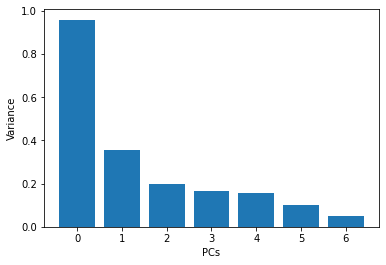

In [18]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [19]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,-0.794796,-0.934499,-0.208334,0.352944,-0.303294,0.480134,0.542404
1,-0.800212,-0.932689,-0.216807,0.348073,-0.283792,0.383022,0.552435
2,-0.794253,-0.934326,-0.208148,0.354438,-0.304244,0.483245,0.542764
3,1.791034,-0.498529,0.321677,-0.375526,-0.285522,0.432100,0.088174
4,1.769790,-0.249092,0.148154,-0.091698,-0.296613,0.474754,0.102492
...,...,...,...,...,...,...,...
29680,-0.630875,-0.201903,-0.299353,-0.432177,0.249930,-0.365894,-0.028678
29681,-0.653748,0.118535,-0.406637,-0.373852,0.201362,-0.363248,-0.033267
29682,-0.676621,0.438973,-0.513921,-0.315526,0.152794,-0.360603,-0.037856
29683,-0.726434,0.914292,-0.769088,0.063644,0.159702,-0.401683,-0.027855


In [20]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-1.052525e-16,2.970440e-16,4.432798e-16,-1.333011e-17,1.710760e-16,-3.315716e-15,-0.404666
1,-1.052525e-16,1.000000e+00,2.241484e-16,-9.371722e-18,7.932220e-16,-1.523722e-16,3.223454e-16,-0.007227
2,2.970440e-16,2.241484e-16,1.000000e+00,-1.480059e-16,5.412330e-16,2.309152e-17,-4.000763e-16,0.015833
3,4.432798e-16,-9.371722e-18,-1.480059e-16,1.000000e+00,6.379849e-16,4.672701e-17,-8.170456e-16,0.009141
4,-1.333011e-17,7.932220e-16,5.412330e-16,6.379849e-16,1.000000e+00,8.290452e-16,-1.557289e-15,0.082535
5,1.710760e-16,-1.523722e-16,2.309152e-17,4.672701e-17,8.290452e-16,1.000000e+00,1.418964e-15,0.017285
6,-3.315716e-15,3.223454e-16,-4.000763e-16,-8.170456e-16,-1.557289e-15,1.418964e-15,1.000000e+00,-0.006133
target,-4.046660e-01,-7.227237e-03,1.583340e-02,9.141112e-03,8.253482e-02,1.728462e-02,-6.133327e-03,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

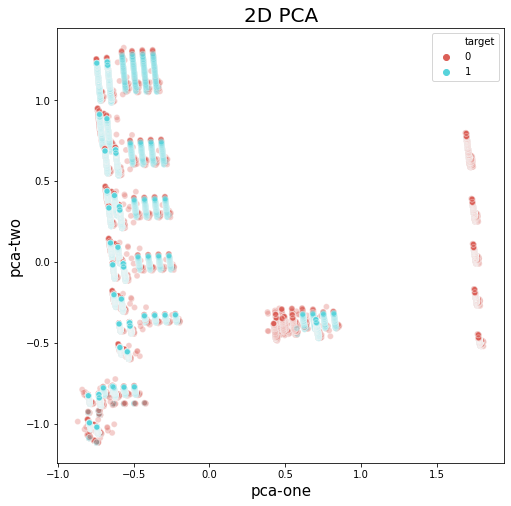

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

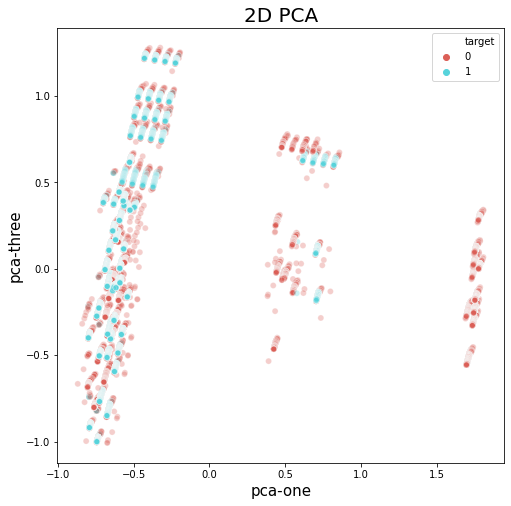

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

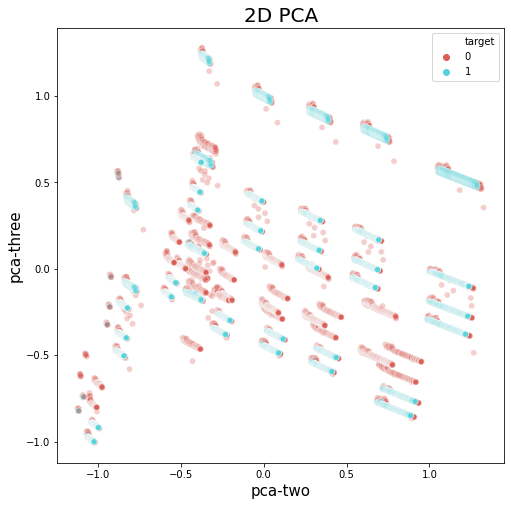

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

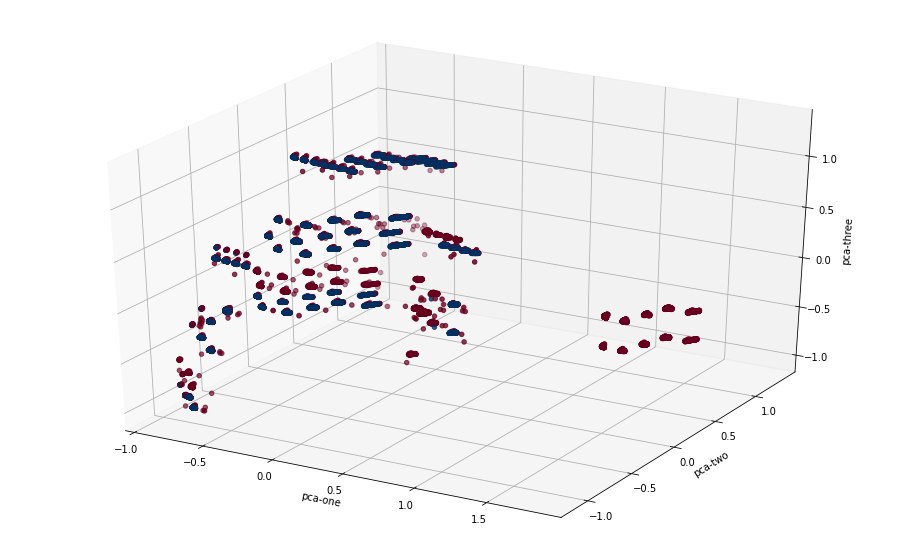

In [25]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

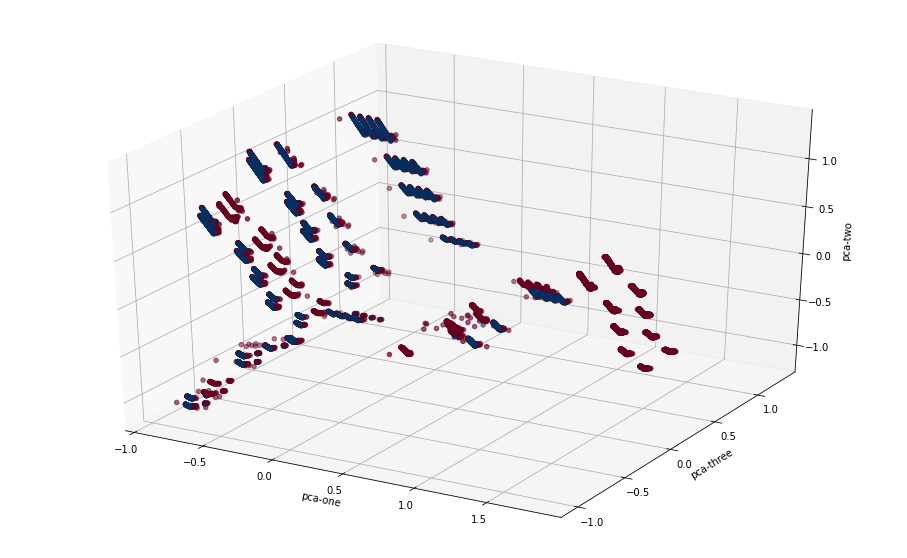

In [26]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

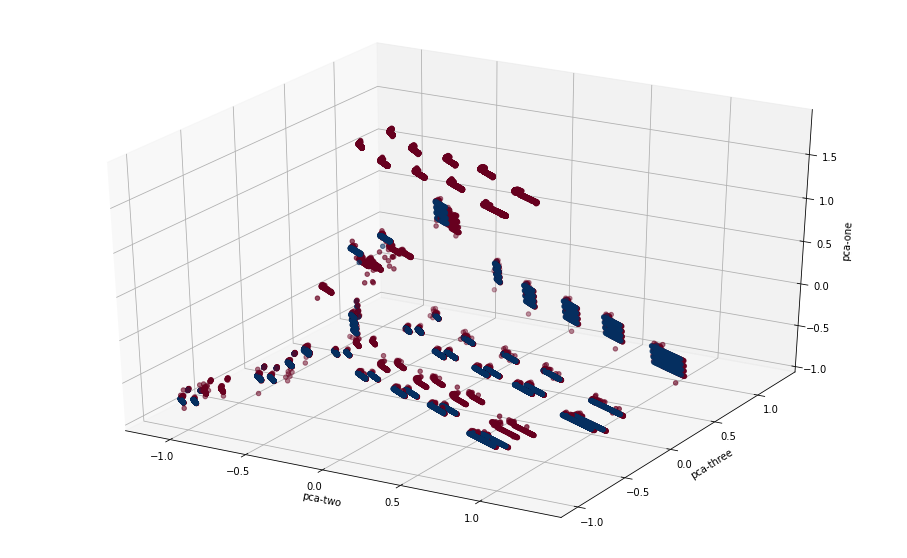

In [27]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [28]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 103.20830488204956 seconds


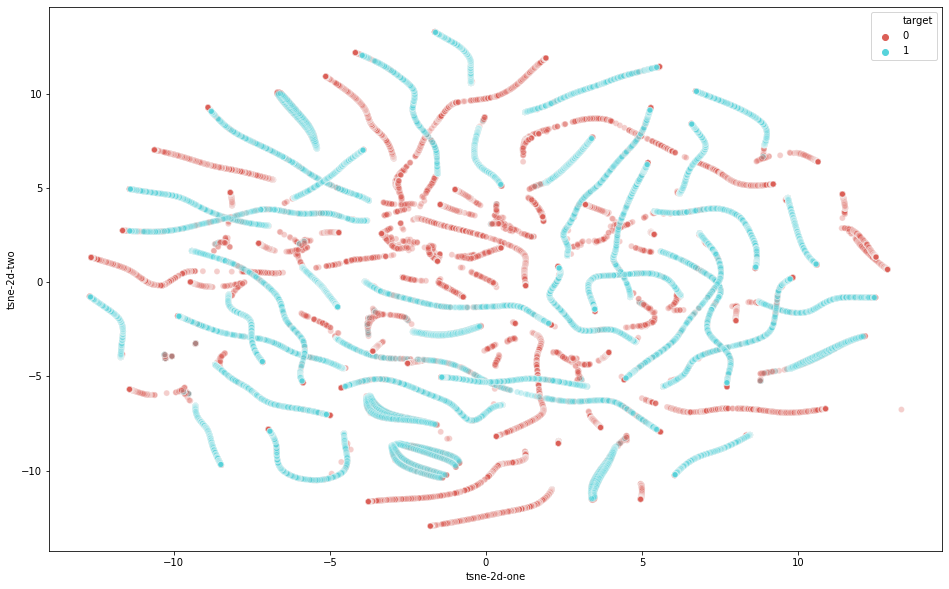

In [29]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

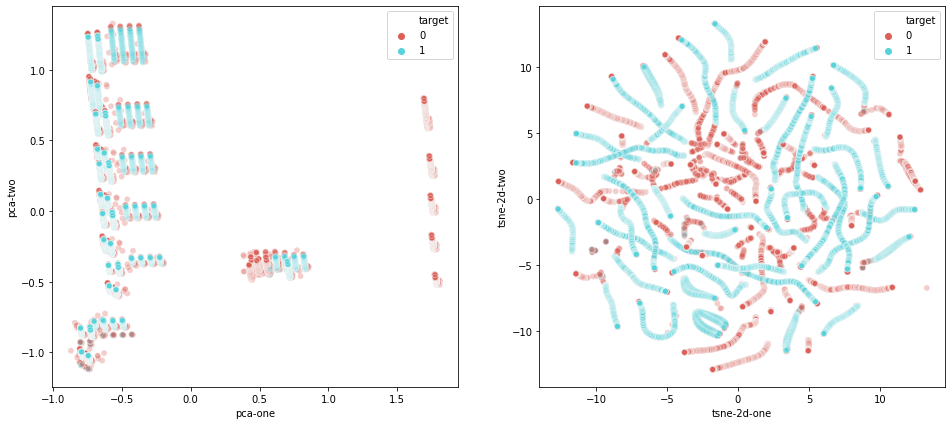

In [30]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [31]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 80.52915453910828 seconds


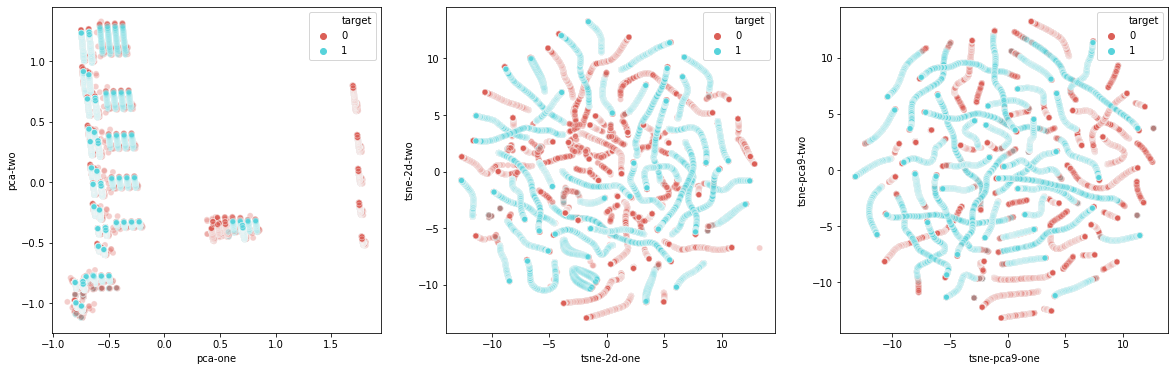

In [32]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [34]:
train_Y = df['target']
train_Y.value_counts()

0    18361
1    11324
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  3129.265277
24               vnet_vc_index  2733.195067
6                           vc  2278.611257
7                       dst_ni   874.489528
8                   dst_router   748.830440
16            max_packet_count   720.808537
0                      outport   458.423237
25            vnet_vc_cc_index   457.145773
15           packet_count_incr   361.124008
14           packet_count_decr   359.684926
17          packet_count_index   260.228014
1                       inport   157.235380
13                enqueue_time   137.704863
18            packet_max_index   135.489039
23  cache_coherence_vnet_index    70.443921
10                   hop_count    48.258540
12              hop_percentage    30.658836


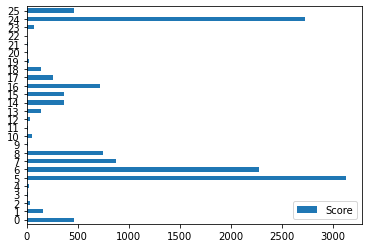

In [37]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [40]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 76.58750210544046
Test Prediction  76.16641401381169


In [42]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,dst_ni,30.092982
0,outport,5.266683
20,cache_coherence_flit_index,4.340831
10,hop_count,3.843849
18,packet_max_index,3.419901
17,packet_count_index,2.792975
4,flit_type,1.722253
2,cache_coherence_type,1.609409
13,enqueue_time,0.518934
23,cache_coherence_vnet_index,0.510148


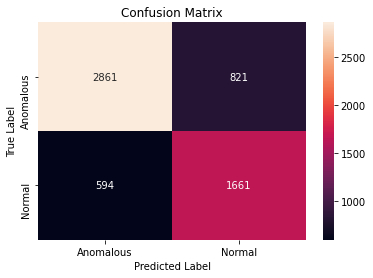

In [43]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      3682
           1       0.67      0.74      0.70      2255

    accuracy                           0.76      5937
   macro avg       0.75      0.76      0.75      5937
weighted avg       0.77      0.76      0.76      5937



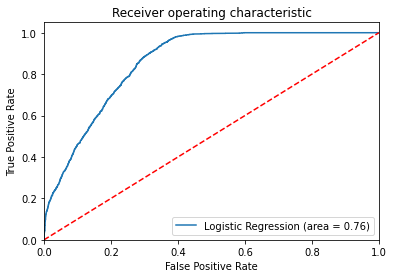

In [45]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [46]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [48]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 84.20919656392117
Test Prediction  76.48644096344955


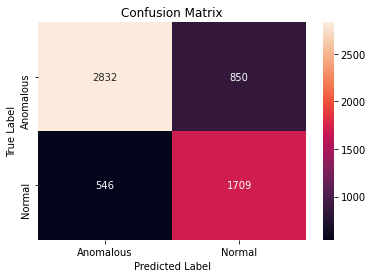

In [49]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      3682
           1       0.67      0.76      0.71      2255

    accuracy                           0.76      5937
   macro avg       0.75      0.76      0.76      5937
weighted avg       0.77      0.76      0.77      5937



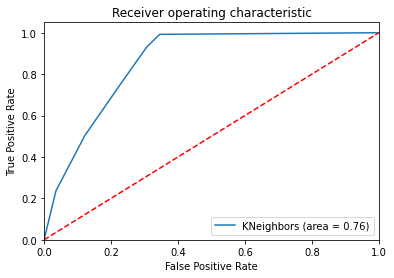

In [51]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [53]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [55]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 68.33838639043289
Test Prediction Score 68.68788950648475


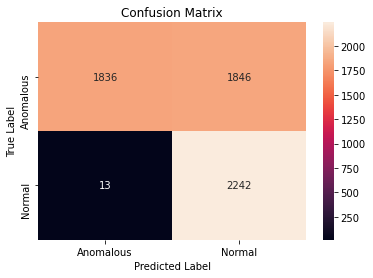

In [56]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.50      0.66      3682
           1       0.55      0.99      0.71      2255

    accuracy                           0.69      5937
   macro avg       0.77      0.75      0.69      5937
weighted avg       0.82      0.69      0.68      5937



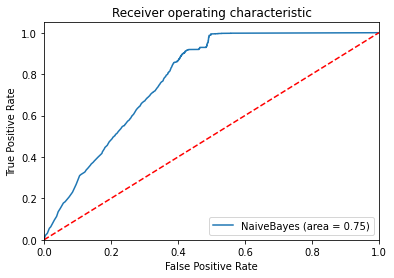

In [58]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [59]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [60]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 18998 samples, validate on 4750 samples
Epoch 1/10
18998/18998 [==============================] - 1s 52us/step - loss: 0.2014 - accuracy: 0.6429 - val_loss: 0.1906 - val_accuracy: 0.6707
Epoch 2/10
18998/18998 [==============================] - 1s 37us/step - loss: 0.1820 - accuracy: 0.6923 - val_loss: 0.1765 - val_accuracy: 0.7171
Epoch 3/10
18998/18998 [==============================] - 1s 38us/step - loss: 0.1718 - accuracy: 0.7157 - val_loss: 0.1691 - val_accuracy: 0.7181
Epoch 4/10
18998/18998 [==============================] - 1s 36us/step - loss: 0.1659 - accuracy: 0.7271 - val_loss: 0.1643 - val_accuracy: 0.7335
Epoch 5/10
18998/18998 [==============================] - 1s 36us/step - loss: 0.1626 - accuracy: 0.7288 - val_loss: 0.1614 - val_accuracy: 0.7434
Epoch 6/10
18998/18998 [==============================] - 1s 38us/step - loss: 0.1607 - accuracy: 0.7325 - val_loss: 0.1598 - val_accuracy: 0.7459
Epoch 7/10
18998/18998 [==============================] - 1s 36us/ste

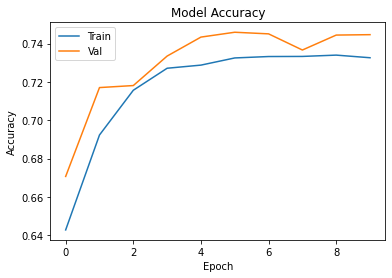

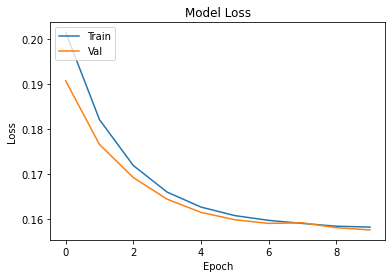

In [61]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [62]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.40%


3-Layer Neural Network

In [63]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 18998 samples, validate on 4750 samples
Epoch 1/15
18998/18998 [==============================] - 1s 38us/step - loss: 0.2174 - accuracy: 0.6058 - val_loss: 0.2113 - val_accuracy: 0.6021
Epoch 2/15
18998/18998 [==============================] - 1s 37us/step - loss: 0.2044 - accuracy: 0.6211 - val_loss: 0.2042 - val_accuracy: 0.6040
Epoch 3/15
18998/18998 [==============================] - 1s 36us/step - loss: 0.2001 - accuracy: 0.6216 - val_loss: 0.2014 - val_accuracy: 0.6040
Epoch 4/15
18998/18998 [==============================] - 1s 36us/step - loss: 0.1982 - accuracy: 0.6216 - val_loss: 0.2002 - val_accuracy: 0.6040
Epoch 5/15
18998/18998 [==============================] - 1s 39us/step - loss: 0.1973 - accuracy: 0.6216 - val_loss: 0.1995 - val_accuracy: 0.6040
Epoch 6/15
18998/18998 [==============================] - 1s 39us/step - loss: 0.1968 - accuracy: 0.6216 - val_loss: 0.1992 - val_accuracy: 0.6040
Epoch 7/15
18998/18998 [==============================] - 1s 37us/ste

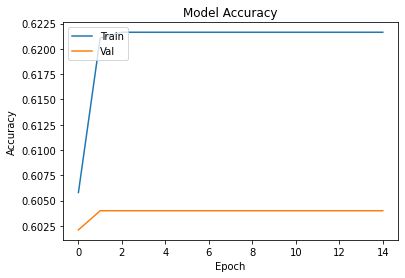

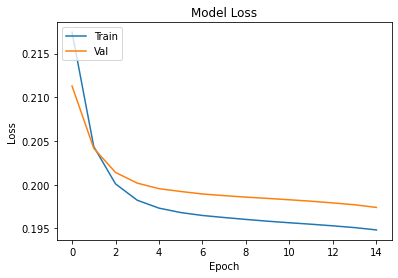

In [64]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [65]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.02%


4-Layer Neural Network



In [66]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 18998 samples, validate on 4750 samples
Epoch 1/30
18998/18998 [==============================] - 1s 40us/step - loss: 0.2261 - accuracy: 0.6216 - val_loss: 0.2167 - val_accuracy: 0.6040
Epoch 2/30
18998/18998 [==============================] - 1s 38us/step - loss: 0.2056 - accuracy: 0.6229 - val_loss: 0.2026 - val_accuracy: 0.6124
Epoch 3/30
18998/18998 [==============================] - 1s 36us/step - loss: 0.1977 - accuracy: 0.6283 - val_loss: 0.1981 - val_accuracy: 0.6305
Epoch 4/30
18998/18998 [==============================] - 1s 36us/step - loss: 0.1954 - accuracy: 0.6352 - val_loss: 0.1967 - val_accuracy: 0.6352
Epoch 5/30
18998/18998 [==============================] - 1s 37us/step - loss: 0.1943 - accuracy: 0.6396 - val_loss: 0.1954 - val_accuracy: 0.6448
Epoch 6/30
18998/18998 [==============================] - 1s 38us/step - loss: 0.1935 - accuracy: 0.6436 - val_loss: 0.1947 - val_accuracy: 0.6583
Epoch 7/30
18998/18998 [==============================] - 1s 38us/ste

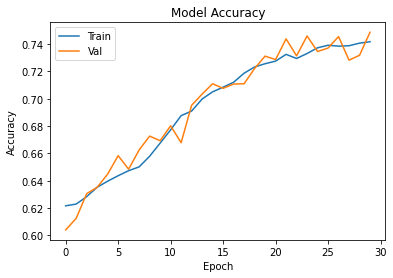

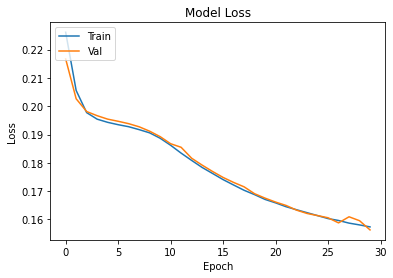

In [67]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [68]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.09%


5-Layer Neural Network Optimized

In [69]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 18998 samples, validate on 4750 samples
Epoch 1/100
18998/18998 [==============================] - 2s 108us/step - loss: 0.1739 - accuracy: 0.7098 - val_loss: 0.1723 - val_accuracy: 0.7103
Epoch 2/100
18998/18998 [==============================] - 1s 70us/step - loss: 0.1574 - accuracy: 0.7415 - val_loss: 0.1527 - val_accuracy: 0.7669
Epoch 3/100
18998/18998 [==============================] - 1s 69us/step - loss: 0.1507 - accuracy: 0.7574 - val_loss: 0.1581 - val_accuracy: 0.7611
Epoch 4/100
18998/18998 [==============================] - 1s 71us/step - loss: 0.1440 - accuracy: 0.7683 - val_loss: 0.1458 - val_accuracy: 0.7577
Epoch 5/100
18998/18998 [==============================] - 1s 72us/step - loss: 0.1417 - accuracy: 0.7722 - val_loss: 0.1434 - val_accuracy: 0.7648
Epoch 6/100
18998/18998 [==============================] - 1s 78us/step - loss: 0.1400 - accuracy: 0.7784 - val_loss: 0.1376 - val_accuracy: 0.7632
Epoch 7/100
18998/18998 [==============================] - 2s 

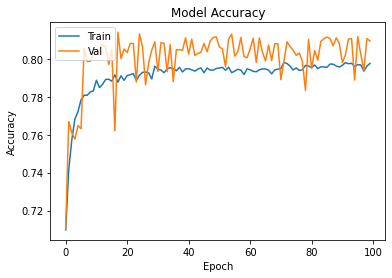

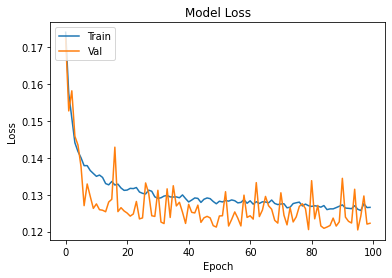

In [70]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [71]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 80.26%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8648728313963282


In [74]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [76]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.4626915950817
Test Prediction Score 89.40542361462019


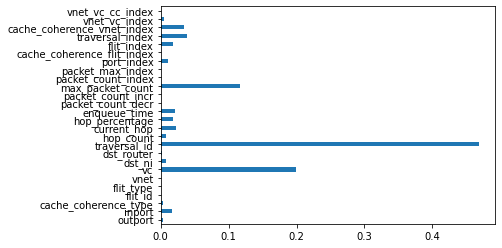

In [77]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

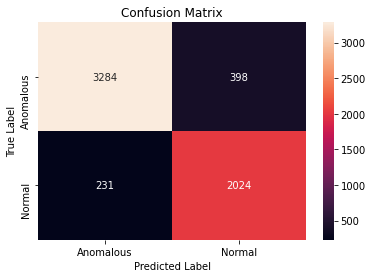

In [78]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3682
           1       0.84      0.90      0.87      2255

    accuracy                           0.89      5937
   macro avg       0.88      0.89      0.89      5937
weighted avg       0.90      0.89      0.89      5937



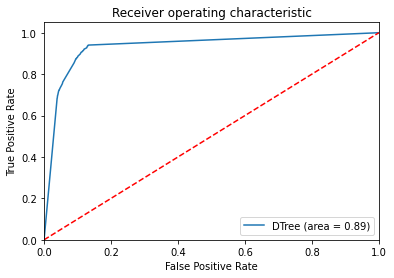

In [80]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [83]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [85]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.96833417550953
Test Prediction Score 90.43287855819437


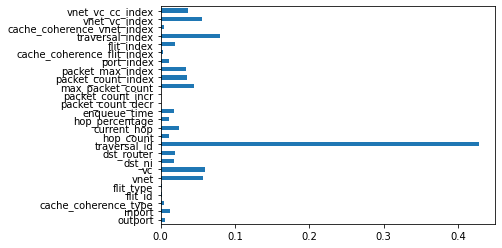

In [86]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

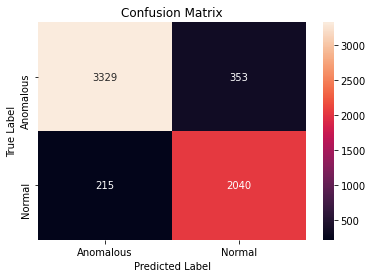

In [87]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [88]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3682
           1       0.85      0.90      0.88      2255

    accuracy                           0.90      5937
   macro avg       0.90      0.90      0.90      5937
weighted avg       0.91      0.90      0.90      5937



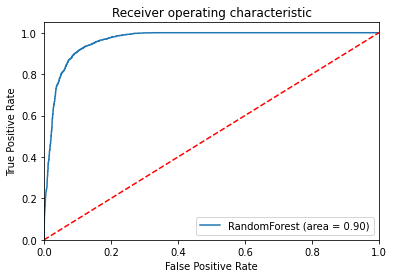

In [89]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [92]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [94]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.64628600303183
Test Prediction Score 95.08169108977597


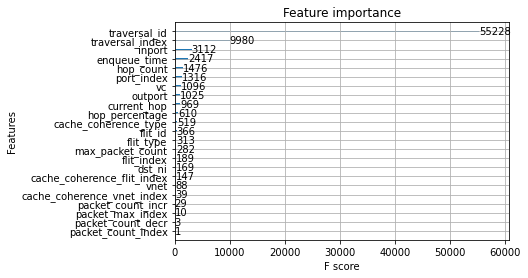

In [95]:
plot_importance(xgbc)
plt.show()

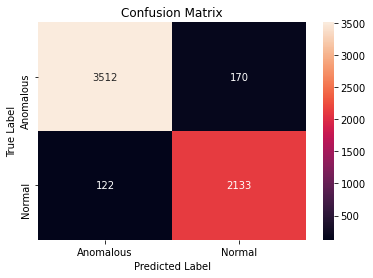

In [96]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [97]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3682
           1       0.93      0.95      0.94      2255

    accuracy                           0.95      5937
   macro avg       0.95      0.95      0.95      5937
weighted avg       0.95      0.95      0.95      5937



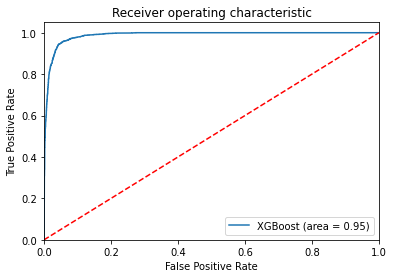

In [98]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [101]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [103]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 90.54657234293414
Test Prediction Score 82.38167424625232


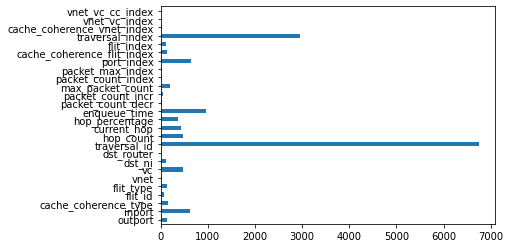

In [104]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

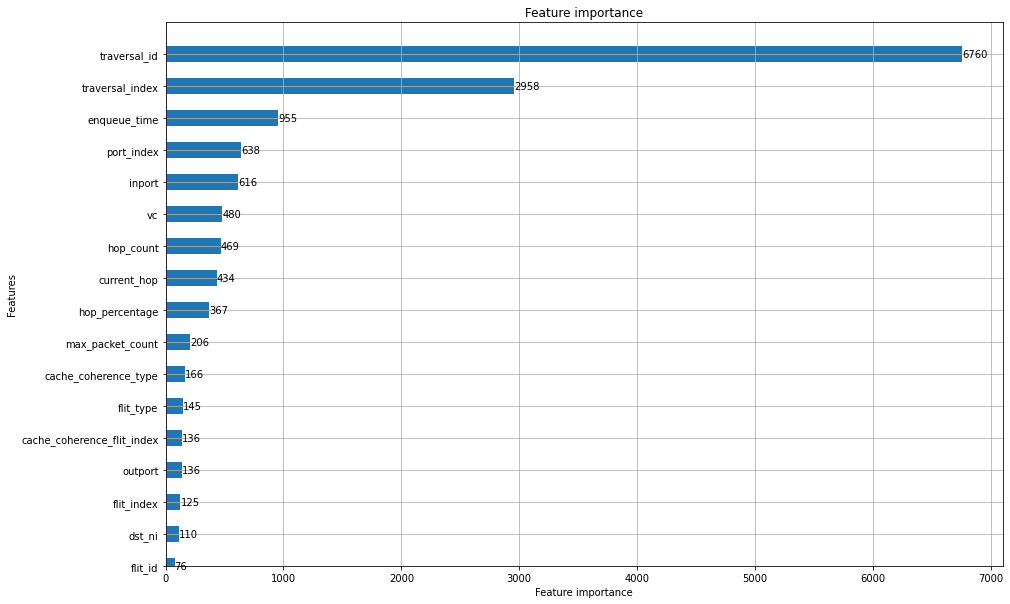

In [105]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7100), ylim = (0,17), figsize = (15,10))
plt.show()

In [106]:
sorted(gbm.feature_importances_,reverse=True)

[6760,
 2958,
 955,
 638,
 616,
 480,
 469,
 434,
 367,
 206,
 166,
 145,
 136,
 136,
 125,
 110,
 76,
 58,
 38,
 35,
 33,
 29,
 29,
 1,
 0,
 0]

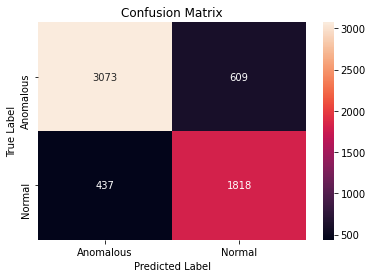

In [107]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [108]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      3682
           1       0.75      0.81      0.78      2255

    accuracy                           0.82      5937
   macro avg       0.81      0.82      0.82      5937
weighted avg       0.83      0.82      0.82      5937



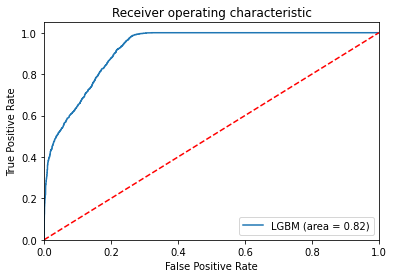

In [109]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()